In [1]:
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import ast
from pathlib import Path
import json
import numpy as np

In [412]:
def plot_coordinates(title, list_of_coordinates):
    grid_size = 25  # Define the grid size
    
    # Create the grid with default color value (e.g., 0)
    grid = np.zeros((grid_size, grid_size))
    
    # Set the color value for the selected coordinates (e.g., 1)
    for x, y in list_of_coordinates:
        grid[y][x] = 1  # Note: row and col are switched here
    
    fig, ax = plt.subplots()
    cax = ax.matshow(grid, cmap='plasma', origin='lower')
    
    # Move the x-axis to the bottom
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')
    
    # Set ticks and labels
    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))
    ax.set_xticklabels(range(grid_size))
    ax.set_yticklabels(range(grid_size))
    
    # Add red dots on points not selected
    for y in range(grid_size):
        for x in range(grid_size):
            if grid[y][x] == 0:
                ax.plot(x, y, 'ro')  # Plot red dots for unselected points
    
    # Add X on the points that are selected
    for y in range(grid_size):
        for x in range(grid_size):
            if grid[y][x] == 1:
                ax.text(x, y, 'X', va='center', ha='center', color='Black', weight='bold')
    
    plt.title(title)
    plt.grid(True)
    plt.show()

In [413]:
def plot_all_designs(data):
    grid_size = 5
    fig, ax = plt.subplots()
    
    # Loop through each design and plot
    for design in data['Designs']:
        title = design['Title']
        coordinates = design['Coordinates']
        plot_coordinates(title, coordinates, ax)
    
    # Set grid and axis labels
    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))
    ax.set_xticklabels(range(grid_size))
    ax.set_yticklabels(range(grid_size))
    
    plt.grid(True)
    plt.show()

In [414]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the OpenAI API key from environment variables
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    api_key=api_key
)

In [620]:
prompt2 = """
A drone us being used to place building blocks on a grid.
You are being asked to come up with the drop off locations for the drone that create a specified design. 
The origin of the grid is [0,0] in the bottom left corner and the last point is [24,24] in the top right.
The X axis goes from [0,0] to [24,0]. The Y axis goes from [0,0] to [0,24].
Make sure none of your points exceed the [24,24] index limit. If they do, fix the design.
Only Integers are allowed.

Your Grid is structured like this:

4 x x x x x
3 x x x x x
2 x x x x x
1 x x x x x
0 x x x x x
  0 1 2 3 4 
  
Please provide the Title and Coordinates in correct JSON format for 5 Designs of your choice.
Check the design before confirming it, such as for legibility and index limit of 24. 
If it is wrong, redo the design and then recheck until you find no errors using a step by step approach.
Only return the JSON as I need to parse it with Python. Do not include any other text or symbols.

Please use the following JSON structure:

{
    "Designs": [
        {
            "Title": "Title of Design",
            "Coordinates": [
                [x, y],
                [x, y]
            ]
      }
    ]
}
"""

In [604]:
prompt3 = """
A drone us being used to place building blocks on a grid.
You are being asked to come up with the drop off locations for the drone that create a specified design. 
The origin of the grid is [0,0] in the bottom left corner and the last point is [24,24] in the top right.
The X axis goes from [0,0] to [24,0]. The Y axis goes from [0,0] to [0,24].
Make sure none of your points exceed the [24,24] index limit. If they do, fix the design.
Only Integers are allowed.

Please provide the Title and Coordinates in correct JSON format for the Design of the word "HELLO".
Make sure your design makes sense and would be legible. Since it is a word, humans read from left to right.
You can provide a seperate design for each letter, but when built on the same grid they should form the specified design.
Make sure the letters are not upside down or backwards otherwise it won't be legible. 
Make sure the design is legible by thinking step by step as you choose points.
Check the design before confirming it, such as for legibility and index limit of 24. 
If it is wrong, redo the design and then recheck until you find no errors using a step by step approach.
Only return the JSON as I need to parse it with Python. Do not include any other text or symbols.

Please use the following structure:

{
    "Designs": [
        {
            "Title": "Title of Design",
            "Coordinates": [
                [x, y],
                [x, y]
            ]
      }
    ]
}
"""

In [612]:
prompt4 = """
A drone us being used to place building blocks on a grid.
You are being asked to come up with the drop off locations for the drone that create a specified design. 
The origin of the grid is [0,0] in the bottom left corner and the last point is [4,4] in the top right.
The X axis goes from [0,0] to [4,0]. The Y axis goes from [0,0] to [0,4].
Make sure none of your points exceed the [4,4] index limit. If they do, fix the design.
Only Integers are allowed.

Please provide the Title and Coordinates in correct JSON format for the Design of the letter "H".
Make sure your design makes sense and would be legible.
Make sure the letter is not upside down or backwards otherwise it won't be legible. 
Make sure the design is legible by thinking step by step as you choose points.
Check the design before confirming it, such as for legibility and index limit of 4. 
If it is wrong, redo the design and then recheck until you find no errors using a step by step approach.
Only return the JSON in the strucuture provided as it needs to be parsed with Python. Do not include any other text or symbols.

Please use the following structure:

{
    "Design": [
        {
            "Title": "Title of Design",
            "Coordinates": [
                [x, y],
                [x, y]
            ]
      }
    ]
}
"""

In [626]:
# Define the prompt
prompt = prompt3

# Send the request to OpenAI using the new ChatCompletion method
response = client.chat.completions.create(
    model="gpt-4o",
    response_format = {"type": "json_object"},
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],   
)

In [627]:
print(response)

ChatCompletion(id='chatcmpl-9oGDeirUzGiUuIAjtkfRlqyMvStH1', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n    "Designs": [\n        {\n            "Title": "H",\n            "Coordinates": [\n                [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], \n                [1, 22], [2, 22], [3, 22],\n                [4, 20], [4, 21], [4, 22], [4, 23], [4, 24]\n            ]\n        },\n        {\n            "Title": "E",\n            "Coordinates": [\n                [6, 20], [6, 21], [6, 22], [6, 23], [6, 24],\n                [7, 20], [7, 24], \n                [8, 20], [8, 22], [8, 24]\n            ]\n        },\n        {\n            "Title": "L",\n            "Coordinates": [\n                [10, 20], [10, 21], [10, 22], [10, 23], [10, 24],\n                [11, 20], [12, 20]\n            ]\n        },\n        {\n            "Title": "L",\n            "Coordinates": [\n                [14, 20], [14, 21], [14, 22], [14, 23

In [628]:
# Extract the response text
response_text = response.choices[0].message.content
print(response_text)

{
    "Designs": [
        {
            "Title": "H",
            "Coordinates": [
                [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], 
                [1, 22], [2, 22], [3, 22],
                [4, 20], [4, 21], [4, 22], [4, 23], [4, 24]
            ]
        },
        {
            "Title": "E",
            "Coordinates": [
                [6, 20], [6, 21], [6, 22], [6, 23], [6, 24],
                [7, 20], [7, 24], 
                [8, 20], [8, 22], [8, 24]
            ]
        },
        {
            "Title": "L",
            "Coordinates": [
                [10, 20], [10, 21], [10, 22], [10, 23], [10, 24],
                [11, 20], [12, 20]
            ]
        },
        {
            "Title": "L",
            "Coordinates": [
                [14, 20], [14, 21], [14, 22], [14, 23], [14, 24],
                [15, 20], [16, 20]
            ]
        },
        {
            "Title": "O",
            "Coordinates": [
                [18, 20], [18, 21], [18, 22], [18, 

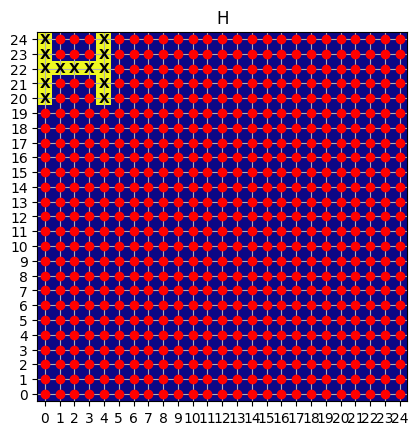

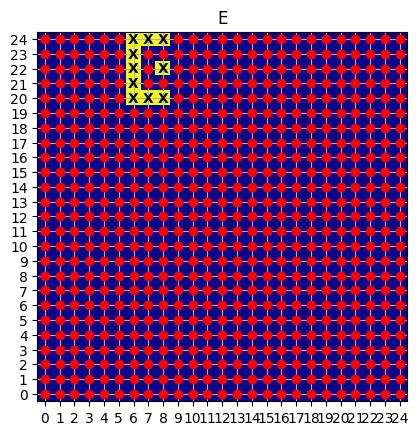

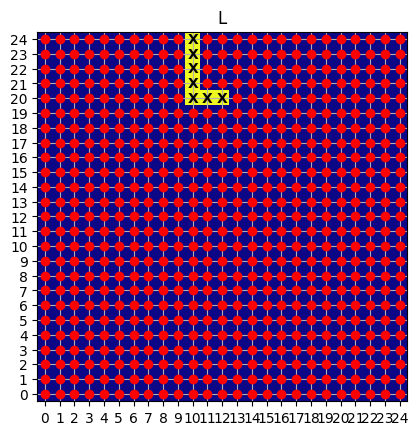

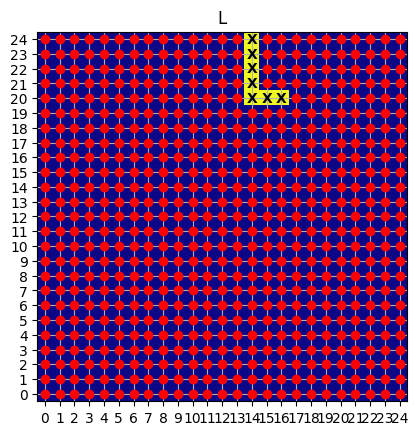

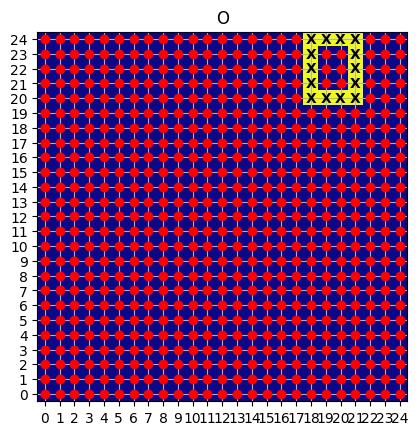

In [629]:
# Load JSON data
data = json.loads(response_text)

# Loop through each design and plot
for design in data['Designs']:
    title = design['Title']
    coordinates = design['Coordinates']
    plot_coordinates(title, coordinates)

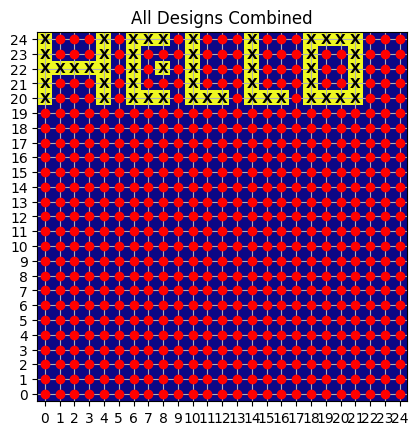

In [630]:
# Aggregate all coordinates
all_coordinates = []
for design in data['Designs']:
    coordinates = design['Coordinates']
    all_coordinates += coordinates

# Plot all aggregated coordinates
plot_coordinates('All Designs Combined', all_coordinates)